# **Overview:** 

The ability to spatially analyze tourism flows offers invaluable insights for policymakers, businesses, and communities. This analysis ventures into Spain's tourism dynamics, focusing on the influx of travelers through 154 select municipalities. Using geodataframes and mapping techniques, I explore the origins and destinations of these visitors, analyzing the spatial patterns that emerge from their travel preferences.

# **Data**  

- Travelers entered by tourist spots and country of residence in Spain (selection of 154 municipalities).  
Data from the 2017 hotel occupancy survey / Publication date: 09/10/2018  
Portal de Datos Abiertos de Esri España  
https://opendata.esri.es/datasets/ComunidadSIG::viajeros-entrados-por-puntos-turisticos-y-pais-de-residencia-/explore?location=28.382780%2C-15.044915%2C8.00  


- Municipal, provincial and regional limits.  
Centro Nacional de Información Geográfica (CNIG) - National Center for Geographic Information
https://centrodedescargas.cnig.es/CentroDescargas/catalogo.do?Serie=LILIM  

- CartoBase ANE  
Centro Nacional de Información Geográfica (CNIG) - National Center for Geographic Information  
https://centrodedescargas.cnig.es/CentroDescargas/catalogo.do?Serie=LILIM

All this data is licensed under CC-BY 4.0.  
https://creativecommons.org/licenses/by/4.0/deed.es

# **Objective**   

The objective of this project is to harness the capabilities of spatial data analysis to dissect and understand some of the patterns of tourism in Spain. By mapping the provinces of touristic sites, identifying regions with the highest visitor numbers, and analyzing visitation patterns of both residents and non-residents, this study aims to unveil the geographical nuances of tourism appeal across Spain. Also, it seeks to determine the most frequent nationalities visiting the selection of 154 sites provided by the data and delve into the preferences of the top three nationalities. This condensed analysis will provide a multifaceted view of the tourism landscape, offering insights into the preferences and behaviors of visitors to Spain.

# **Project Structure**: 

1. **Data Collection and Preparation**
- Data Sources: Identification and collection of data from reliable sources.
- Data Cleaning: Data cleaning to remove inconsistencies, handle missing values, and ensure data quality.
- Geospatial Data Integration: Geospatial data to map the locations of the 154 municipalities and corresponding provinces. This involves using geodataframes, which integrate geographical information with traditional data frames for spatial analysis.
2. [**Spatial Data Analysis**](#Spatial-Data-Analysis)
- [Province Identification](#Province-Identification): Use of eospatial data to identify the provinces of the selected municipalities, mapping the touristic sites within Spain's geographical context.
- [Visitor Analysis by Province:](#Visitor-Analysis-by-Province) Analysis of the data to identify provinces with the highest number of visitors, distinguishing between resident and non-resident tourists to understand regional tourism appeal.
- [Pattern Analysis:](#Patterns-Analysis) Use of spatial analysis techniques to examine the patterns of visits, focusing on the differences between resident and non-resident behaviors and preferences.

3. [**Demographic Analysis**](#Demographic-Analysis)  

- [Nationality Identification:](#Nationality-Identification) Analysis of the data to identify the most common nationalities of visitors to Spain, providing insights into Spain's international appeal.
- [Top Nationalities and Preferences:](#Top-Nationalities-and-Preferences) Analysis of the top three nationalities visiting Spain and maping of their top five preferred sites. 

5. [**Conclusion and Insights**:](#Conclusion-and-Insights)
- Synthesis of Findings: Summarize the key findings from the spatial and demographic analyses, highlighting the geographical nuances and visitor patterns discovered.
- Implications: Discuss the implications of these findings for tourism management. 

# **Limitations**  
- **Selection of Tourist Sites:** The analysis is confined to 154 selected municipalities, which, while significant, do not encompass all tourist destinations within Spain.
- **Coverage of Nationalities:** This study analyzes only some nationalities visiting the selected municipalities. Consequently, it does not represent the entire spectrum of international visitors to Spain. The exclusion of other nationalities means that the analysis might overlook emerging trends and preferences among a broader demographic.
- **Limited Data Scope:** Specific data that could reveal deeper insights—such as visitor spending, duration of stay, and repeat visitation rates—are not available within the scope of this analysis. Such information could significantly enrich our understanding of tourist behavior and preferences.
- **Temporal Dynamics:** This analysis presents a snapshot based on static data, which may not capture seasonal variations or year-on-year trends in tourism flows. The dynamic nature of tourism, influenced by factors such as global events, economic conditions, and changing travel preferences, means that patterns can evolve over time.  

By acknowledging these limitations, this project aims to provide a transparent and honest assessment of what the analysis can and cannot convey.

In [1]:
# Libraries
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

In [2]:
# Load file 
import pandas as pd
data = gpd.read_file("/kaggle/input/spanish-visitors-analysis/Spanish_Visitors_Analysis/Visitors_Turist_Sites/22d3b657-b6ac-4eca-a5a6-6ef4d207422e2020329-1-6y5z1v.8ch38.shp")

In [3]:
# Data inspection 
data.head()

OBJECTID Codigo             Texto    Total  Residentes  No_residen  \
0         1  01059   Vitoria-Gasteiz   293649      219706       73943   
1         2  02003          Albacete   192898      171669       21229   
2         3  03014  Alicante/Alacant   818700      395414      423286   
3         4  03031          Benidorm  2073180     1008809     1064371   
4         5  03063             Dénia   178054      114850       63203   

   Unión_Eur  Alemania  Bélgica  Francia  Italia  Países_Ba  Portugal  \
0      55203      5690     4065    19420    4959       2923      7932   
1      13930      1550     1000     3043    1867        624      1250   
2     275892     21286    12713    31142   26013      18288      4222   
3    1018842      8422    45546    17426    7049      31580     32343   
4      52395      8882     2325     6288    2718       4835       686   

   Reino_Unid  Japón  Estados_Un    Shape__Are     Shape__Len  \
0        4643    433        1971  5.161138e+08  152167.794891   
1        1981     89         891  1.890078e+09  316172.515894   
2       80809   1269       12416  3.280981e+08  189827.477506   
3      820659    237        2126  6.265783e+07   50162.286745   
4       19854    270        1110  1.094165e+08  108273.859283   

                                            geometry  
0  POLYGON ((-2.61707 42.92282, -2.61950 42.91808...  
1  POLYGON ((-1.96575 39.18099, -1.96459 39.17945...  
2  MULTIPOLYGON (((-0.47783 38.16664, -0.47779 38...  
3  MULTIPOLYGON (((-0.12822 38.50178, -0.12888 38...  
4  MULTIPOLYGON (((-0.03037 38.88081, -0.02962 38...

In [4]:
# Dimension 
dim = data.shape
dim

(154, 19)

In [5]:
# Description of variables 
basic_st = data.describe()
basic_st

OBJECTID         Total    Residentes    No_residen     Unión_Eur  \
count  154.000000  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02   
mean    77.500000  4.937275e+05  2.108308e+05  2.828967e+05  2.015325e+05   
std     44.600075  1.027060e+06  4.023167e+05  6.855837e+05  3.874800e+05   
min      1.000000  1.651000e+04  1.226800e+04  1.952000e+03  1.768000e+03   
25%     39.250000  1.200730e+05  5.878425e+04  2.319425e+04  1.395250e+04   
50%     77.500000  2.562845e+05  1.159840e+05  8.509200e+04  5.382400e+04   
75%    115.750000  4.565810e+05  2.355382e+05  2.854798e+05  2.511995e+05   
max    154.000000  9.409384e+06  4.414794e+06  6.118916e+06  3.210830e+06   

            Alemania        Bélgica        Francia         Italia  \
count     154.000000     154.000000     154.000000     154.000000   
mean    45297.454545    7201.824675   26240.948052   16063.324675   
std    108647.167919   16094.495157   63560.010100   50517.512101   
min       132.000000      27.000000     196.000000      63.000000   
25%      1633.750000     593.750000    3040.750000     911.250000   
50%      6641.500000    1782.000000    8890.500000    3878.000000   
75%     35939.750000    5667.250000   20526.000000   10240.750000   
max    819582.000000  129753.000000  609779.000000  457620.000000   

           Países_Ba       Portugal     Reino_Unid          Japón  \
count     154.000000     154.000000     154.000000     154.000000   
mean    10955.662338    6458.805195   57001.740260    3147.422078   
std     23168.123989   18245.177124  117819.521361   16213.291501   
min        79.000000      33.000000     153.000000       0.000000   
25%       726.750000     588.250000    2052.000000      49.000000   
50%      3094.000000    2026.000000    8101.500000     188.000000   
75%     10936.750000    5047.250000   49913.500000     659.750000   
max    185493.000000  186925.000000  820659.000000  160249.000000   

          Estados_Un    Shape__Are     Shape__Len  
count     154.000000  1.540000e+02     154.000000  
mean    15545.785714  3.709040e+08  131358.482827  
std     77918.810596  4.731595e+08  119808.627095  
min        30.000000  1.143745e+07   16996.879908  
25%       574.250000  8.839878e+07   62341.279617  
50%      1969.000000  2.077894e+08   97860.059308  
75%      4838.000000  4.555636e+08  153950.014479  
max    726969.000000  2.934581e+09  821289.116398

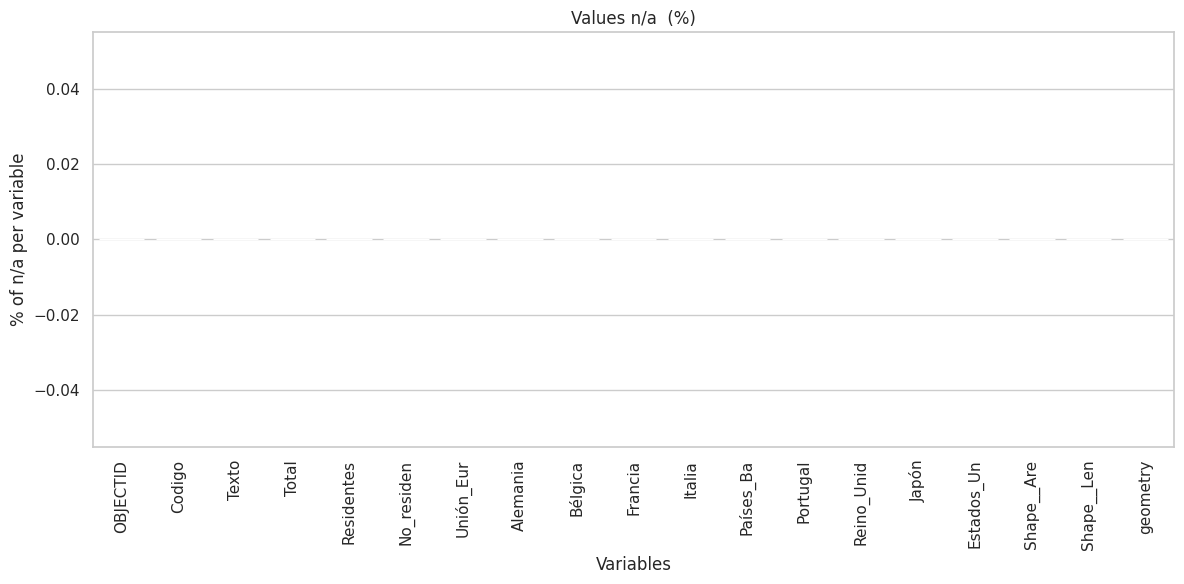

In [6]:
# Nulls and n/a check 
n_a = data.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


No missing data, and the quantities seem to be consistent

### **Spatial Data Analysis** : 
Let's map out the municipalities surrounding the tourist sites to gain a comprehensive overview of their geographical positioning.

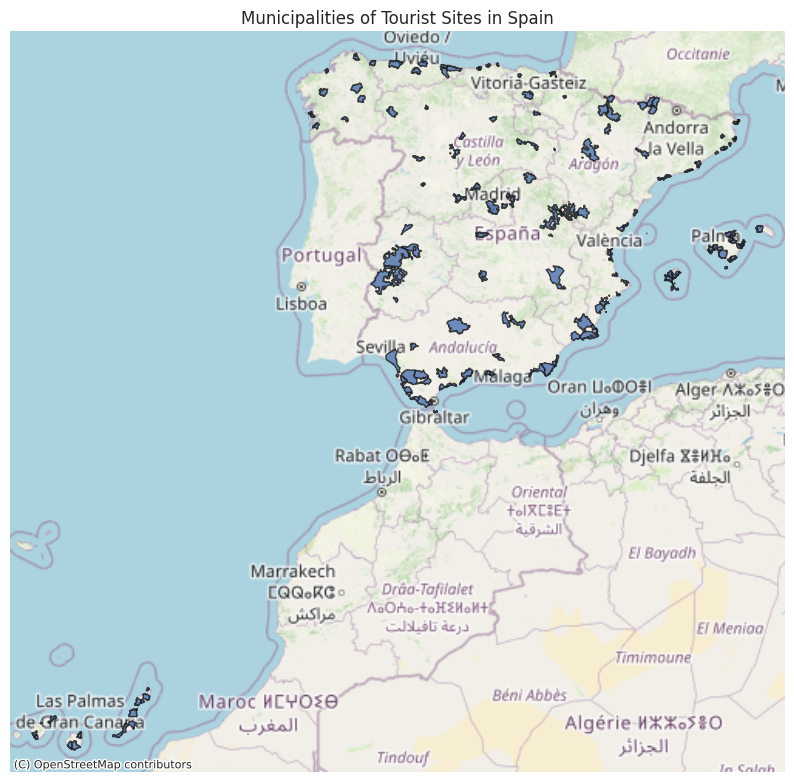

In [7]:
# GeoDataFrame to EPSG:3857 (WGS 84 / Pseudo-Mercator)
data_transformed = data.to_crs(epsg=3857)

# Figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
data_transformed.plot(ax=ax, alpha=0.8, edgecolor='k')

# Adds the base map from contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Limits of the axis to include a larger area
x_min, y_min, x_max, y_max = data_transformed.total_bounds
buffer = 70000  
ax.set_xlim(x_min - buffer, x_max + buffer)
ax.set_ylim(y_min - buffer, y_max + buffer)

# Labels and title 
ax.set_title('Municipalities of Tourist Sites in Spain')
ax.axis('off')  

plt.show()

Due to the distance between the Canary Islands and the Iberian Peninsula, it would be reazonable to analyze them separately for a clearer visualization.

In [8]:
# Dataframe for the Canary Islands (Code 35 and 38)
        
data_canarias = data[data['Codigo'].str[:2].isin(['35', '38'])]
data_canarias.head()

OBJECTID Codigo                        Texto    Total  Residentes  \
117       118  35003                      Antigua   316379       40763   
118       119  35012                        Mogán   574739       67134   
119       120  35014                    Oliva, La   354310       51207   
120       121  35015                       Pájara  1020111       87388   
121       122  35016  Palmas de Gran Canaria, Las   392635      210793   

     No_residen  Unión_Eur  Alemania  Bélgica  Francia  Italia  Países_Ba  \
117      275616     262138     27468      946    16695   11512       8820   
118      507606     418211     43373    10779    11740    4038      20333   
119      303104     292559     79784     3728    18337   16552      11855   
120      932723     896756    544424     6553    78970   45991      19474   
121      181842     128365     29393     2953     7074   10890       5731   

     Portugal  Reino_Unid  Japón  Estados_Un    Shape__Are     Shape__Len  \
117       945      156257     43         573  3.235778e+08   93152.044176   
118      1840      149134    115         738  2.217618e+08   87984.727864   
119       366      128119     49         460  4.633218e+08  143937.925143   
120      2554      108243     32        1302  4.937392e+08  210740.411635   
121      4647       19545   1009        4481  1.313283e+08  120101.510091   

                                              geometry  
117  POLYGON ((-13.97801 28.45316, -13.97784 28.453...  
118  POLYGON ((-15.72397 27.94883, -15.72366 27.948...  
119  MULTIPOLYGON (((-13.81429 28.76595, -13.81424 ...  
120  POLYGON ((-14.15206 28.40594, -14.15137 28.405...  
121  POLYGON ((-15.41978 28.18095, -15.41976 28.180...

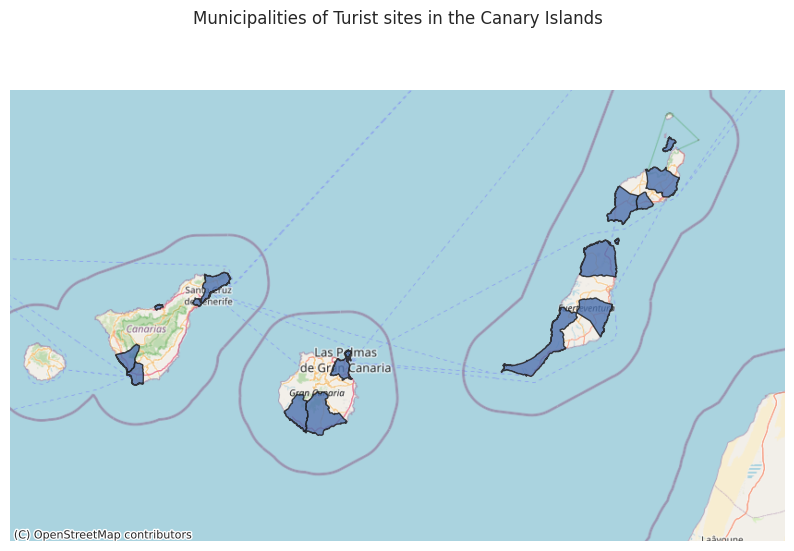

In [9]:
# GeoDataFrame to EPSG:3857 (WGS 84 / Pseudo-Mercator)
data_transformed = data_canarias.to_crs(epsg=3857)

# Figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
data_transformed.plot(ax=ax, alpha=0.8, edgecolor='k')

# Base map from contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Limits of the axis to include a larger area
x_min, y_min, x_max, y_max = data_transformed.total_bounds
buffer = 70000  
ax.set_xlim(x_min - buffer, x_max + buffer)
ax.set_ylim(y_min - buffer, y_max + buffer)

# Labels and title
ax.set_title('Municipalities of Turist sites in the Canary Islands')
ax.axis('off')  

plt.show()

In [10]:
# Dataframe for the Iberian Peninsula 
        
data_peninsula = data[~data['Codigo'].str[:2].isin(['35', '38'])]
data_peninsula.head()

OBJECTID Codigo             Texto    Total  Residentes  No_residen  \
0         1  01059   Vitoria-Gasteiz   293649      219706       73943   
1         2  02003          Albacete   192898      171669       21229   
2         3  03014  Alicante/Alacant   818700      395414      423286   
3         4  03031          Benidorm  2073180     1008809     1064371   
4         5  03063             Dénia   178054      114850       63203   

   Unión_Eur  Alemania  Bélgica  Francia  Italia  Países_Ba  Portugal  \
0      55203      5690     4065    19420    4959       2923      7932   
1      13930      1550     1000     3043    1867        624      1250   
2     275892     21286    12713    31142   26013      18288      4222   
3    1018842      8422    45546    17426    7049      31580     32343   
4      52395      8882     2325     6288    2718       4835       686   

   Reino_Unid  Japón  Estados_Un    Shape__Are     Shape__Len  \
0        4643    433        1971  5.161138e+08  152167.794891   
1        1981     89         891  1.890078e+09  316172.515894   
2       80809   1269       12416  3.280981e+08  189827.477506   
3      820659    237        2126  6.265783e+07   50162.286745   
4       19854    270        1110  1.094165e+08  108273.859283   

                                            geometry  
0  POLYGON ((-2.61707 42.92282, -2.61950 42.91808...  
1  POLYGON ((-1.96575 39.18099, -1.96459 39.17945...  
2  MULTIPOLYGON (((-0.47783 38.16664, -0.47779 38...  
3  MULTIPOLYGON (((-0.12822 38.50178, -0.12888 38...  
4  MULTIPOLYGON (((-0.03037 38.88081, -0.02962 38...

In [11]:
# GeoDataFrame to EPSG:3857 (WGS 84 / Pseudo-Mercator)
data_transformed = data_peninsula.to_crs(epsg=3857)

# Figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
data_transformed.plot(ax=ax, alpha=0.8, edgecolor='k')

# Base map from contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Limits of the axis to include a larger area
x_min, y_min, x_max, y_max = data_transformed.total_bounds
buffer = 70000  # Adjust this buffer as needed
ax.set_xlim(x_min - buffer, x_max + buffer)
ax.set_ylim(y_min - buffer, y_max + buffer)

# Labels and title 
ax.set_title('Municipalities Turist Sites in the Iberian Peninsula')
ax.axis('off')  

plt.show()

As evident from the spread of tourist sites, they are distributed across the Spanish territory. Despite the limited selection, it appears that all provinces are represented.

**Division by provinces of Spain**

In [12]:
province_limits_peninsula = gpd.read_file('/kaggle/input/spanish-visitors-analysis/Spanish_Visitors_Analysis/Spanish_Provinces_Peninsula/recintos_provinciales_inspire_peninbal_etrs89.shp')
province_limits_canarias = gpd.read_file('/kaggle/input/spanish-visitors-analysis/Spanish_Visitors_Analysis/Spanish_Provinces_CanaryIslands/recintos_provinciales_inspire_canarias_regcan95.shp')


In [13]:
# Description of variables 
basic_st = province_limits_peninsula.describe()
basic_st_2 = province_limits_canarias.describe()


/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1598: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


In [14]:
basic_st

INSPIREID COUNTRY  \
count                         52      52   
unique                        51       1   
top     ES.IGN.BDDAE.34205400000      ES   
freq                           2      52   

                                                   NATLEV NATLEVNAME  \
count                                                  52         52   
unique                                                  1          2   
top     https://inspire.ec.europa.eu/codelist/Administ...  Provincia   
freq                                                   52         51   

            NATCODE  NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
count            52        52      51      51       0   
unique           51        52       6      18       0   
top     34205400000  Albacete     ES4    ES41     NaN   
freq              2         1      16       9     NaN   

                                                 geometry  
count                                                  52  
unique                                                 52  
top     POLYGON ((-2.552123728 38.085011653, -2.552065...  
freq                                                    1

In [15]:
basic_st_2

/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:397: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:398: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/opt/conda/lib/python3.10/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/opt/conda/lib/python3.10/site-packages/pandas/io/formats/printi

INSPIREID COUNTRY  \
count                          2       2   
unique                         2       1   
top     ES.IGN.BDDAE.34053500000      ES   
freq                           1       2   

                                                   NATLEV NATLEVNAME  \
count                                                   2          2   
unique                                                  1          1   
top     https://inspire.ec.europa.eu/codelist/Administ...  Provincia   
freq                                                    2          2   

            NATCODE    NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
count             2           2       2       2       0   
unique            2           2       1       1       0   
top     34053500000  Las Palmas     ES7    ES70     NaN   
freq              1           1       2       2     NaN   

                                                 geometry  
count                                                   2  
unique                                                  2  
top     (POLYGON ((-15.6974888 27.77108936, -15.697498...  
freq                                                    1

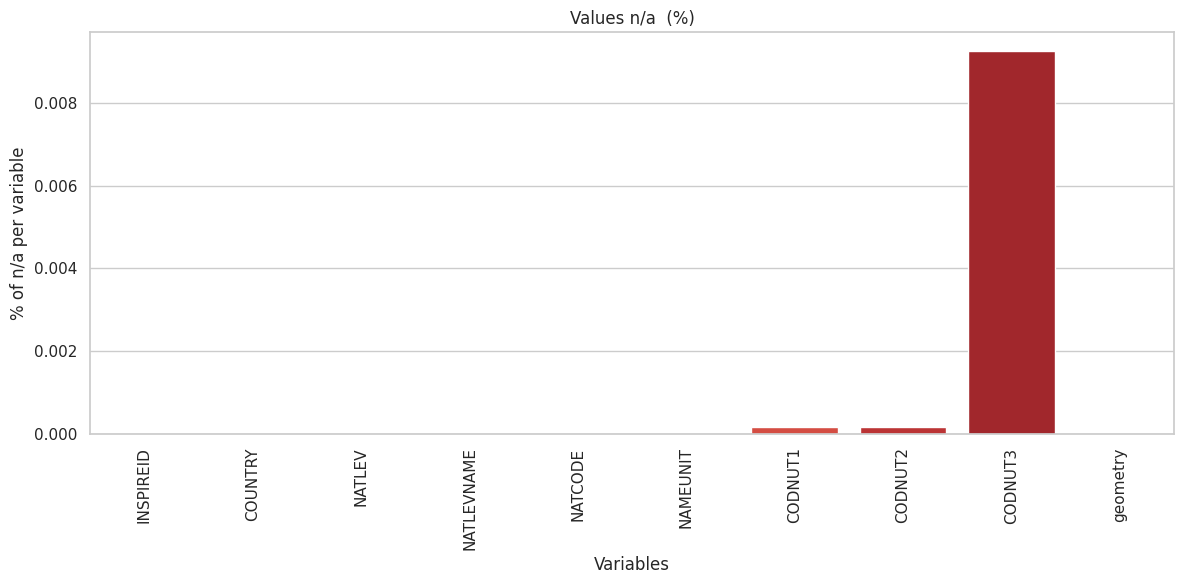

In [16]:
# Nulls and n/a check 

n_a = province_limits_peninsula.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
# Nulls and n/a check 

n_a = province_limits_canarias.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The missing data is not relevant for this analysis

In [18]:
# Checking the GeoDataFrame
province_limits_peninsula.head()

INSPIREID COUNTRY  \
0  ES.IGN.BDDAE.34080200000      ES   
1  ES.IGN.BDDAE.34100300000      ES   
2  ES.IGN.BDDAE.34010400000      ES   
3  ES.IGN.BDDAE.34070500000      ES   
4  ES.IGN.BDDAE.34110600000      ES   

                                              NATLEV NATLEVNAME      NATCODE  \
0  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34080200000   
1  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34100300000   
2  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34010400000   
3  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34070500000   
4  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34110600000   

           NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
0          Albacete     ES4    ES42    None   
1  Alacant/Alicante     ES5    ES52    None   
2           Almería     ES6    ES61    None   
3             Ávila     ES4    ES41    None   
4           Badajoz     ES4    ES43    None   

                                            geometry  
0  POLYGON ((-2.55212 38.08501, -2.55207 38.08517...  
1  MULTIPOLYGON (((-0.75223 37.88691, -0.75225 37...  
2  MULTIPOLYGON (((-3.03624 35.93791, -3.03637 35...  
3  POLYGON ((-5.43382 40.24491, -5.43430 40.24276...  
4  POLYGON ((-6.81290 38.12594, -6.81314 38.12621...

 ### Province Identification
 
 This map shows the division by provinces of Spain, showing each name according to the official name

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
province_limits_peninsula.plot(ax=ax, color='lightblue', edgecolor='gray')

# Replaces some values in the column 'NAMEUNITS'
province_limits_peninsula['NAMEUNIT'] = province_limits_peninsula['NAMEUNIT'].replace\
({'Gibraltar. Territorio no asociado a ninguna provincia': 'Gibraltar (not associated with a province)',\
'Territorios no asociados a ninguna provincia': 'Territories not associated with any province',\
 'Ceuta': 'Ceuta (not associated with a province)'})


# Iterates through each row in the GeoDataFrame, using the NAMEUNIT column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in province_limits_peninsula.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='black')

# Labels and titles
ax.set_title('Spanish provinces (in Spanish) in the Iberian Peninsula.')
ax.axis('off')
plt.show()

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plots each province with a different color
colors = ['lightgreen', 'lightblue']  
for color, (idx, row) in zip(colors, province_limits_canarias.iterrows()):
    province_limits_canarias[province_limits_canarias.index == idx].plot(ax=ax, color=color)

# Adds province names as annotations
for idx, row in province_limits_canarias.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3), 
                textcoords="offset points",
                horizontalalignment='center', 
                fontsize=12, 
                color='black')

# Title and labels
ax.set_title('Provinces in the Canary Islands')
ax.axis('off')
plt.show()

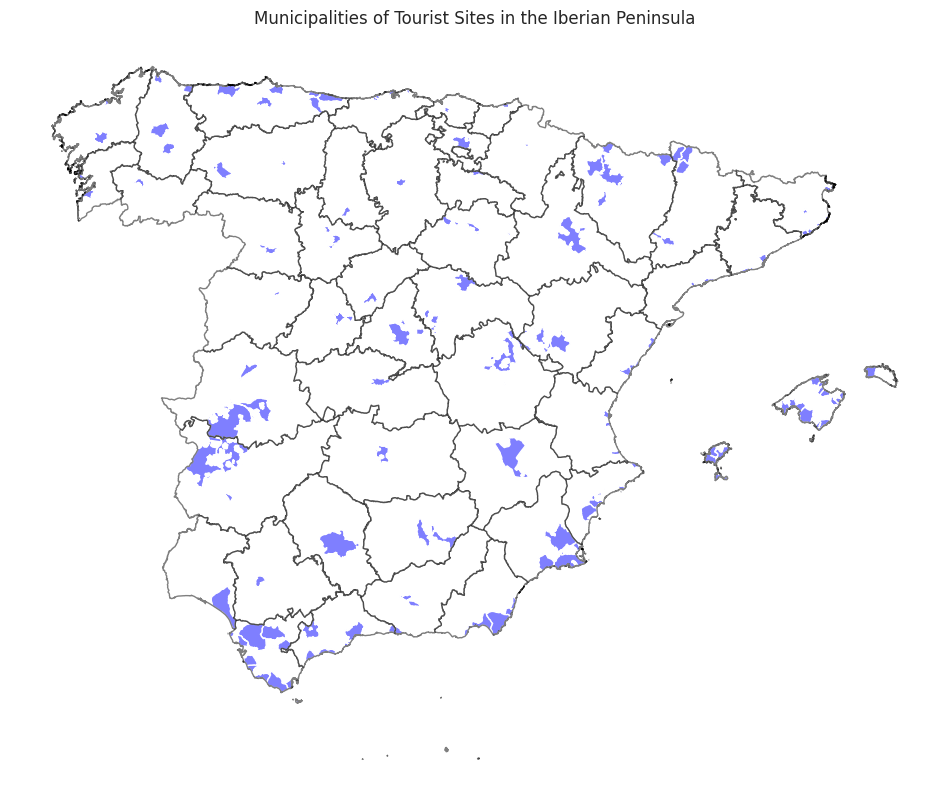

In [21]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
data_peninsula.plot(ax=ax, color='blue', )

# Overlays the data on the base map
province_limits_peninsula.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)  

# Title and labels
ax.set_title('Municipalities of Tourist Sites in the Iberian Peninsula')
ax.axis('off')
plt.show()

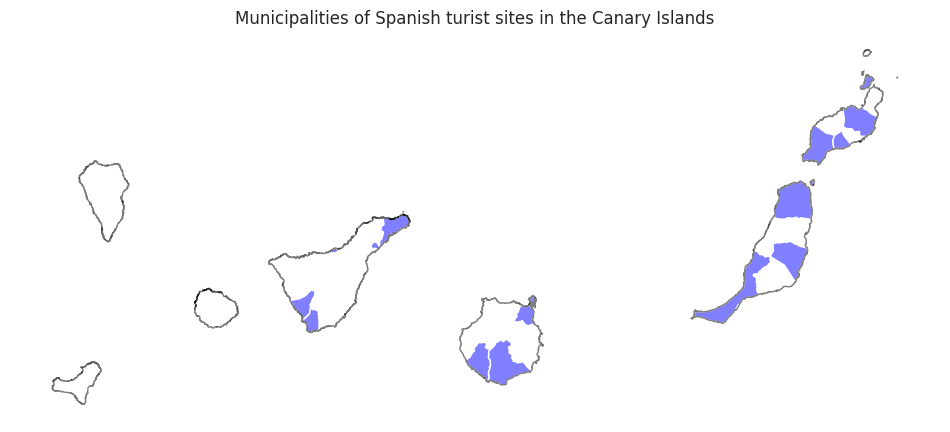

In [22]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
data_canarias.plot(ax=ax, color='blue', )

# Overlays the data on the base map
province_limits_canarias.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)  

# Titles and labels
ax.set_title('Municipalities of Spanish turist sites in the Canary Islands')
ax.axis('off')
plt.show()

As we can see on the maps,  the distribution of tourist sites is uneven across the peninsula. Some provinces have a high concentration of tourist sites, as indicated by the numerous blue areas, while others have very few or none at all. There seems to be a trend where coastal areas, especially along the Mediterranean coast, have more tourist sites. This could be due to the popularity of beaches and coastal resorts. Inland provinces, especially those away from major cities or natural attractions, have fewer marked tourist sites.

As for the Canary Islands, there's a clear variation in the number of tourist sites from one island to another. Some islands show a higher concentration, suggesting these are more popular or developed in terms of tourism infrastructure. Similar to the peninsula, there's a noticeable focus on coastal areas. 

For tourists or tourism planners, this map could be a useful tool for identifying regions that are tourist hotspots or areas that are less frequented and could be of interest for those seeking less crowded or nature-oriented experiences.

### Patterns Analysis

The goal is to identify provinces with the highest number of visitors, distinguishing between resident and non-resident tourists to understand regional tourism appeal.

In [23]:
# Copy of the DataFrame
data_values = data.copy()

# Loops and extracts the codes from province_limits_peninsula
province_code=[]
for i in province_limits_peninsula['NATCODE']:
    province_code.append(i[4:6])

# Creates a new dataframe with codes and provinces Names
province_code = pd.DataFrame(province_code, columns=['Code'])
province_code['Province'] = province_limits_peninsula['NAMEUNIT']

# Adds the codes of the provinces of the Canary Islands
# Define las nuevas filas
new_rows = [{'Code': '35', 'Province': 'Las Palmas'}, {'Code': '38', 'Province': 'Santa Cruz de Tenerife'}]
new_rows_df = pd.DataFrame(new_rows)
province_code = pd.concat([province_code, new_rows_df], ignore_index=True)

In [24]:
# Creates the column 'Code' in data using the first 2 digits of 'Codigo' 
data['Code'] = data['Codigo'].str[0:2]

# Merges the dataframes using 'left' to keep all the rows
merged_data = pd.merge(data, province_code, left_on='Code', right_on='Code', how='left')

In [25]:
# Column names
merged_data.columns

Index(['OBJECTID', 'Codigo', 'Texto', 'Total', 'Residentes', 'No_residen',
       'Unión_Eur', 'Alemania', 'Bélgica', 'Francia', 'Italia', 'Países_Ba',
       'Portugal', 'Reino_Unid', 'Japón', 'Estados_Un', 'Shape__Are',
       'Shape__Len', 'geometry', 'Code', 'Province'],
      dtype='object')

In [26]:
# New dataframe with useful columns 
data_values_en = merged_data[['Texto', 'Total', 'Residentes', 'No_residen',
       'Unión_Eur', 'Alemania', 'Bélgica', 'Francia', 'Italia', 'Países_Ba',
       'Portugal', 'Reino_Unid', 'Japón', 'Estados_Un', 'Shape__Are',
       'Shape__Len', 'geometry', 'Code', 'Province']]

In [27]:
# Columns renamed into English 
new_names = {
    'Texto': 'Municipality',
    'Residentes':'Residents',
    'No_residen':'Non_residents',
    'Unión_Eur':'European_Union',
    'Alemania':'Germany',
    'Bélgica':'Belgium',
    'Francia':'France',
    'Italia':'Italy',
    'Países_Ba':'Netherlands',
    'Reino_Unid':'United_Kingdom',
    'Japón':'Japan',
    'Estados_Un': 'United_States'
}


data_values_en.rename(columns=new_names, inplace=True)

/tmp/ipykernel_18/1761166900.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_values_en.rename(columns=new_names, inplace=True)


In [28]:
# Checks the column names 
data_values_en.columns

Index(['Municipality', 'Total', 'Residents', 'Non_residents', 'European_Union',
       'Germany', 'Belgium', 'France', 'Italy', 'Netherlands', 'Portugal',
       'United_Kingdom', 'Japan', 'United_States', 'Shape__Are', 'Shape__Len',
       'geometry', 'Code', 'Province'],
      dtype='object')

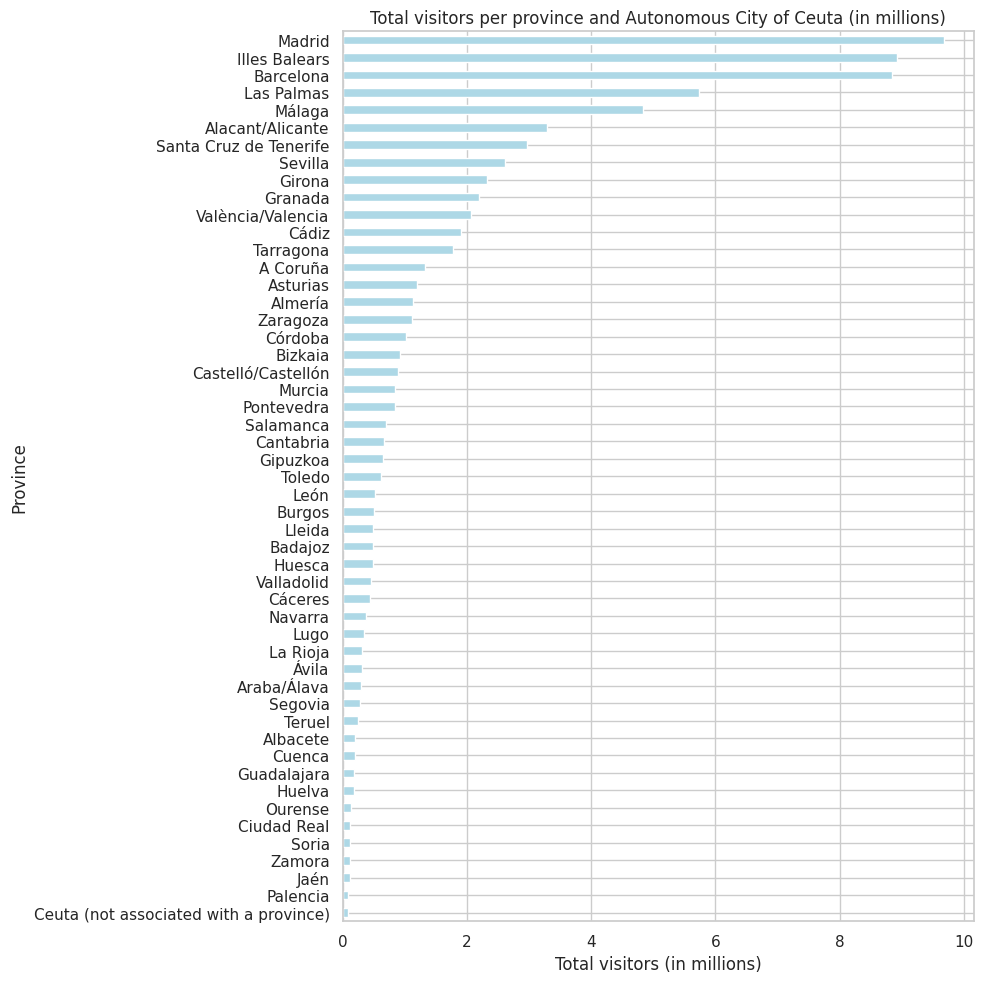

In [29]:
# Groups by province and sums the total visitors
total_per_province = data_values_en.groupby('Province')['Total'].sum()

# Sorts from highest to lowest
total_per_province = total_per_province.sort_values(ascending=True)

# Converts total visitors to ten thousands
total_per_province_ten_thousands = total_per_province / 1000000

# Creates the vertical bar plot
plt.figure(figsize=(10, 10))  # Figure size
total_per_province_ten_thousands.plot(kind='barh', color='lightblue')  
plt.title('Total visitors per province and Autonomous City of Ceuta (in millions)')  
plt.ylabel('Province')  
plt.xlabel('Total visitors (in millions)')  
plt.tight_layout()  
plt.show()  

In [30]:
# Merges the total_per_province data with province_limits_peninsula
merged_data_map = province_limits_peninsula.merge(total_per_province, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

In [31]:
# Checks if after merging any total value is n/a
merged_data_map['Total'].isna()

# Drops n/a values: Gibraltar and Melilla. 
merged_data_map = merged_data_map.dropna(subset=['Total'])

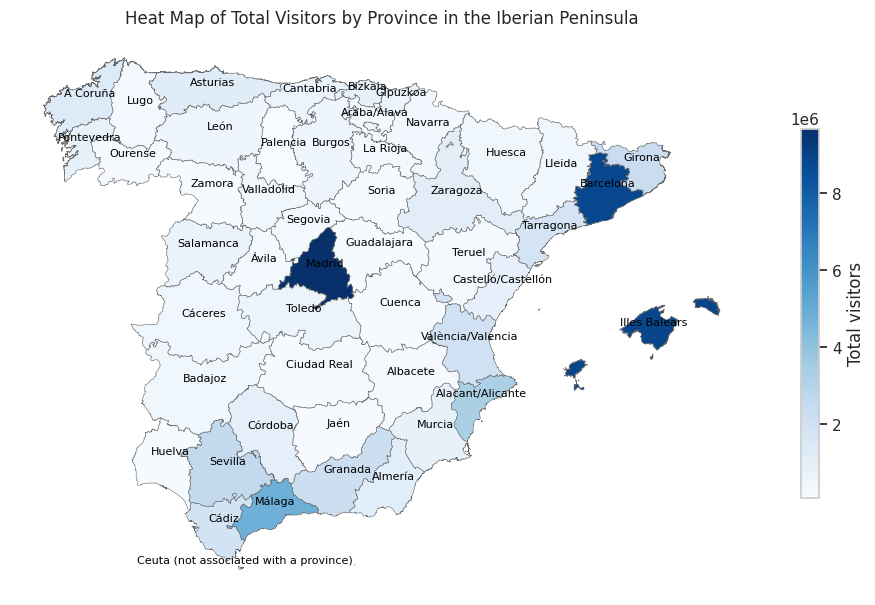

In [32]:
# Plots the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total visitors per province')

merged_data_map.plot(column='Total', cmap='Blues', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the 'NAMEUNIT' column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in merged_data_map.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles
ax.set_title('Heat Map of Total Visitors by Province in the Iberian Peninsula')
ax.axis('off')
plt.show()

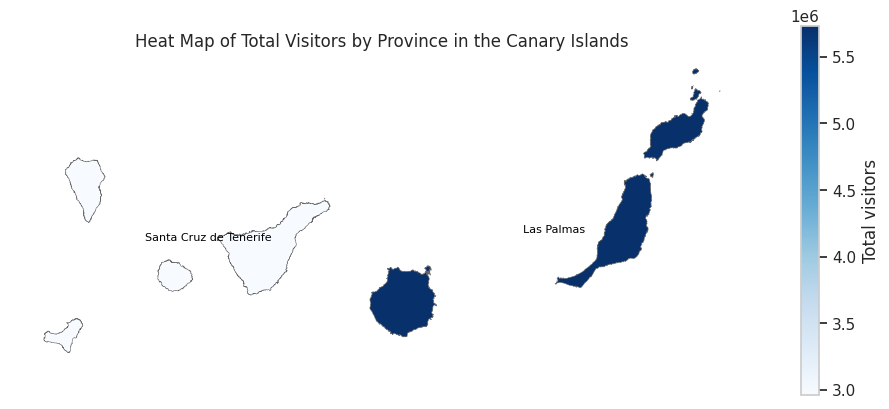

In [33]:
# Merges the total_per_province data with province_limits_canarias
merged_data_map2 = province_limits_canarias.merge(total_per_province, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total visitors per province')
merged_data_map2.plot(column='Total', cmap='Blues', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the NAMEUNIT column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in province_limits_canarias.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles 
ax.set_title('Heat Map of Total Visitors by Province in the Canary Islands')
ax.axis('off')
plt.show()

It's evident that certain provinces attract more visitors than others. The darkest shades are centered on Madrid, indicating it has the highest number of visitors, which is not surprising given that Madrid is Spain's capital and a major European cultural center.  
Similarly, the coastal areas such as Barcelona, which is known for its art and architecture, and the Balearic Islands, famous for their beaches, also show high visitor numbers. Coastal provinces such as Málaga and Cádiz in the south also appear to attract a significant number of tourists, likely due to the sunny weather and attractive beaches.  
In contrast, the interior provinces, away from the coast and major urban centers, attract fewer visitors. This is typical of tourist patterns where visitors often flock to capital cities for their cultural and historical offerings, coastal regions for their beaches and leisure activities, and islands for their unique landscapes and holiday resorts.

The islands of the province of Las Palmas, exhibit the darkest shades, suggesting they are the most visited locations within the archipelago.The other islands, while still receiving visitors, show lighter shades, indicating fewer tourists. As we highlighted in the previous analysis, the province of Las Palmas has more tourist sites than the province of Tenerife, which could be one of the reazons why the number of tourist is higher.

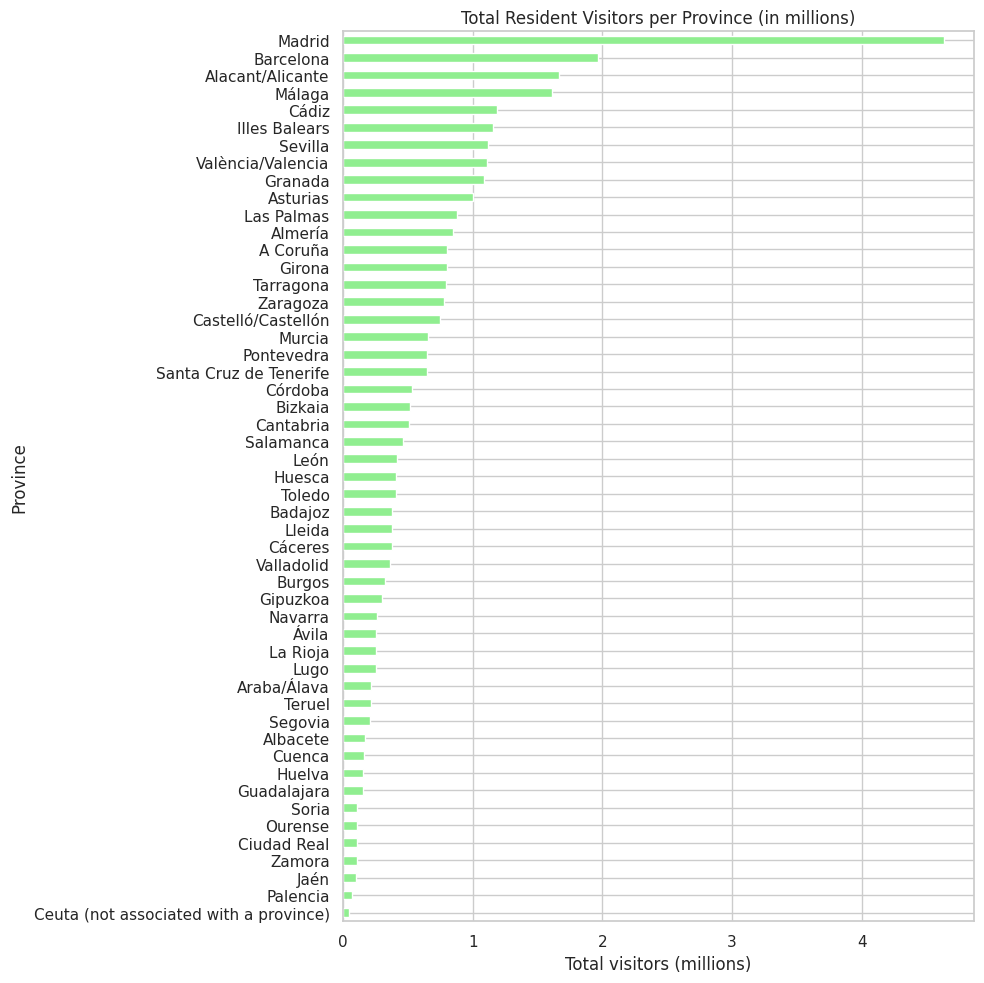

In [34]:
# Groups by province and sums the total resident visitors
total_residents = data_values_en.groupby('Province')['Residents'].sum()

# Sorts from highest to lowest
total_residents = total_residents.sort_values(ascending=True)

# Converts total visitors to ten thousands
total_residents_mill = total_residents / 1000000

# Creates the vertical bar plot
plt.figure(figsize=(10, 10))  # Figure size
total_residents_mill.plot(kind='barh', color='Lightgreen')  
plt.title('Total Resident Visitors per Province (in millions)')  
plt.ylabel('Province')  
plt.xlabel('Total visitors (millions)')  
plt.tight_layout() 
plt.show()  

In [35]:
# Merges the total_per_province data with province_limits_peninsula
merged_data_map = province_limits_peninsula.merge(total_residents, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

# Drops n/a values: Gibraltar and Melilla. 
merged_data_map = merged_data_map.dropna(subset=['Residents'])

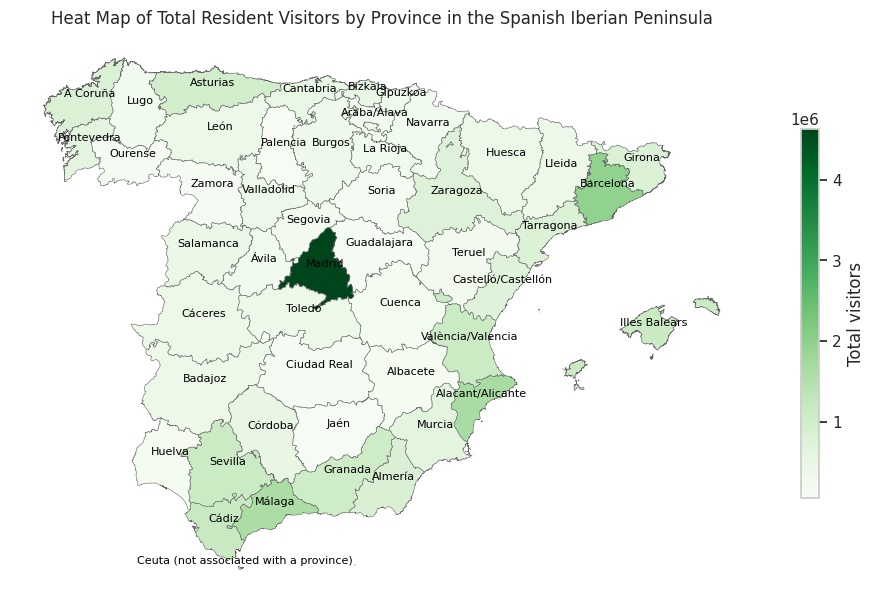

In [36]:
# Plots the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total resident visitors per province')

merged_data_map.plot(column='Residents', cmap='Greens', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the 'NAMEUNIT' column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in merged_data_map.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles
ax.set_title('Heat Map of Total Resident Visitors by Province in the Spanish Iberian Peninsula')
ax.axis('off')
plt.show()

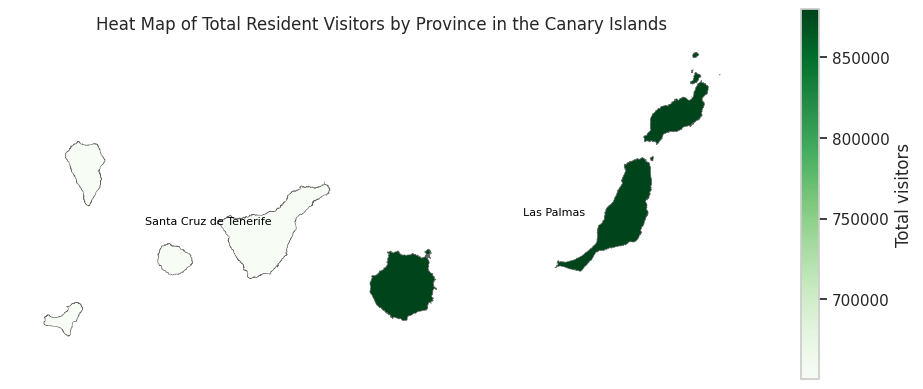

In [37]:
# Merges the total_per_province data with province_limits_canarias
merged_data_map2 = province_limits_canarias.merge(total_residents, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total visitors per province')
merged_data_map2.plot(column='Residents', cmap='Greens', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the NAMEUNIT column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in province_limits_canarias.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles 
ax.set_title('Heat Map of Total Resident Visitors by Province in the Canary Islands')
ax.axis('off')
plt.show()

The map indicates that Madrid has the highest concentration of resident visitors, which is understandable given that it's the capital and central hub for many Spaniards traveling for both business and leisure.  
Other provinces such as Barcelona, Sevilla, Málaga, and Cádiz also show higher levels of resident visitors. These areas are known for their cultural heritage, cuisine, festivals, and, in the case of Málaga and Cádiz, their coastal attractions. The popularity of these provinces among resident visitors suggests that Spaniards also value the diverse experiences offered by their country's different regions.  
Once again, we see lighter shades across the interior, suggesting fewer resident visitors, which could be due to a combination of factors such as less tourist infrastructure or fewer well-known attractions. 
Overall, the pattern shown on the map reflects a common trend in domestic tourism, where major cities and coastal areas with a variety of attractions and amenities draw the most visitors. It also highlights the central role of Madrid as a hub for domestic travel within Spain.

In the case of the Canary Islands, both provinces appear to have a high number of resident visitors, but Las Palmas shows a darker shade, suggesting it has more resident visitors compared to Santa Cruz de Tenerife. This analysis shows the same pattern as the previous one. The distinction in resident visitor numbers between the two provinces might reflect differences in the resident population sizes, transportation links, and the diversity of tourist infrastructure available. Las Palmas is the 11th and Santa Cruz de Tenerife is the 20th in terms of resident visitors across Spain, which makes clear that both provinces are popular destinations anyway for Spanish residents. 

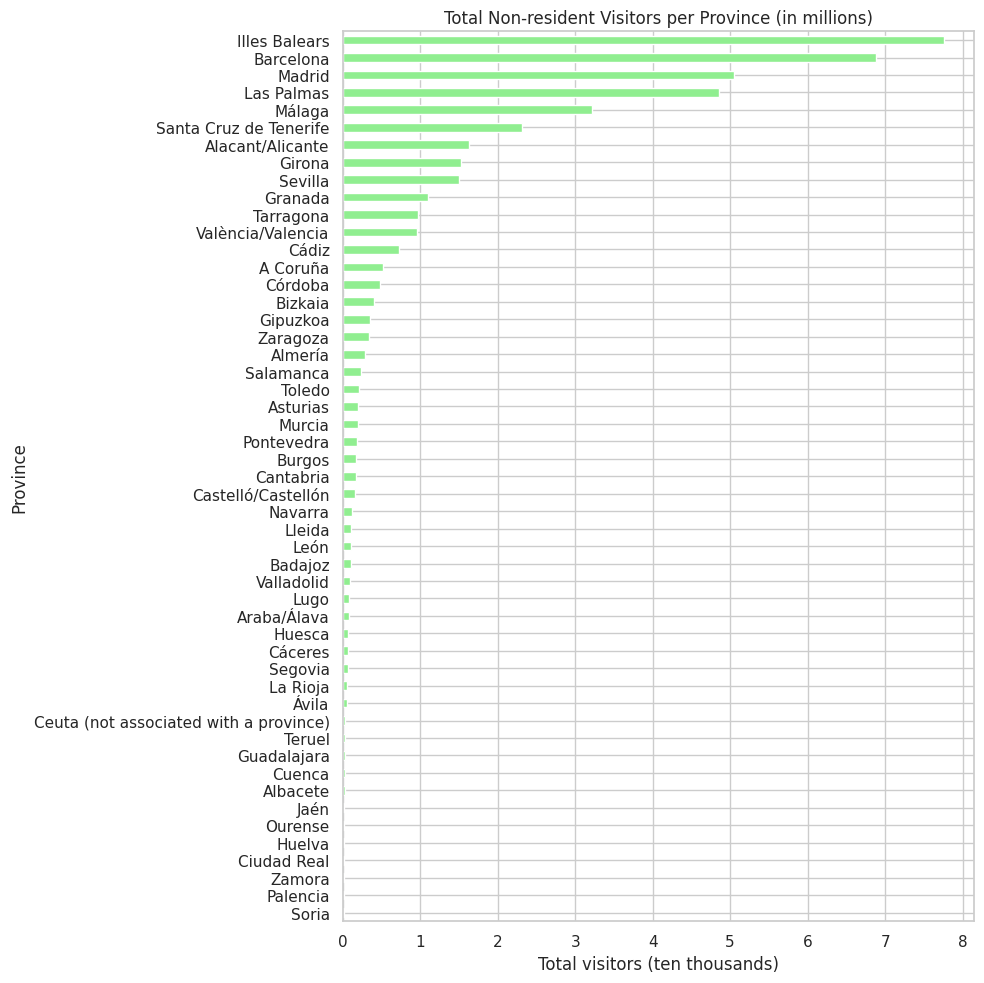

In [38]:
# Groups by province and sums the total foreign visitors
total_non_residents = data_values_en.groupby('Province')['Non_residents'].sum()

# Sorts from highest to lowest
total_non_residents = total_non_residents.sort_values(ascending=True)

# Converts total visitors to ten thousands
total_non_residents_mill = total_non_residents / 1000000

# Creates the vertical bar plot
plt.figure(figsize=(10, 10))  # Figure size
total_non_residents_mill.plot(kind='barh', color='lightgreen')  
plt.title('Total Non-resident Visitors per Province (in millions)')  
plt.ylabel('Province')  
plt.xlabel('Total visitors (ten thousands)')  
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

In [39]:
# Merges the total_per_province data with province_limits_peninsula
merged_data_map = province_limits_peninsula.merge(total_non_residents, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

# Drops n/a values: Gibraltar and Melilla. 
merged_data_map = merged_data_map.dropna(subset=['Non_residents'])

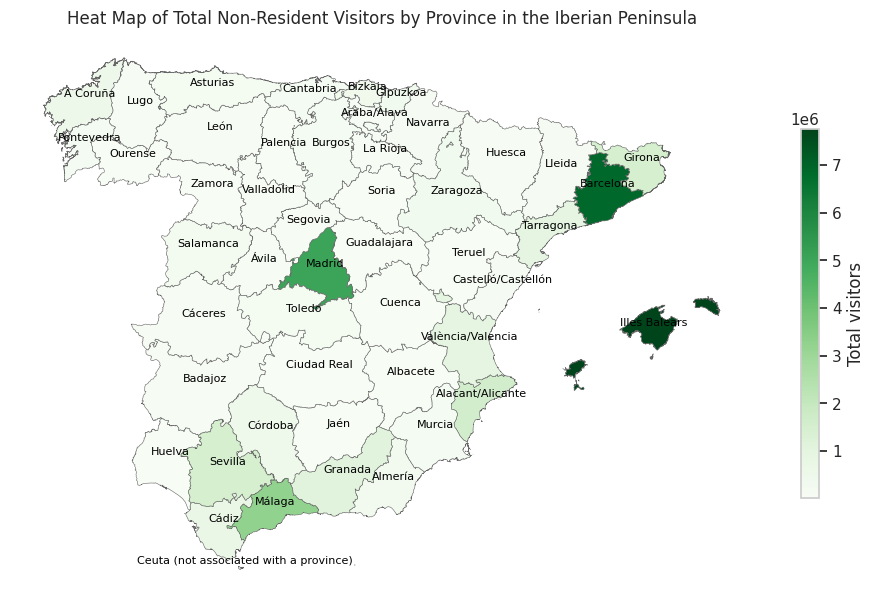

In [40]:
# Plots the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total resident visitors per province')

merged_data_map.plot(column='Non_residents', cmap='Greens', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the 'NAMEUNIT' column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in merged_data_map.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles
ax.set_title('Heat Map of Total Non-Resident Visitors by Province in the Iberian Peninsula')
ax.axis('off')
plt.show()

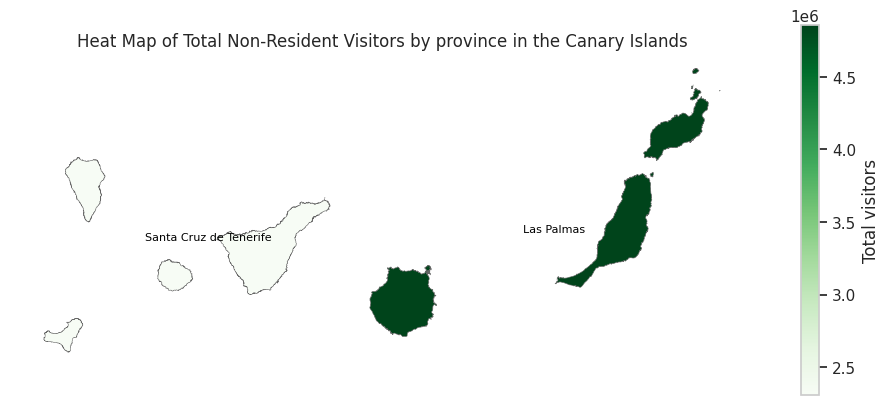

In [41]:
# Merges the total_per_province data with province_limits_canarias
merged_data_map2 = province_limits_canarias.merge(total_non_residents, how='left', left_on='NAMEUNIT', 
                                                  right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Total visitors per province')
merged_data_map2.plot(column='Non_residents', cmap='Greens', linewidth=0.4, ax=ax, edgecolor='0.4', legend=True,
                    legend_kwds={'label': "Total visitors", 'orientation': "vertical", 'shrink': 0.4})

# Iterates through each row in the GeoDataFrame, using the NAMEUNIT column for the province names and the geometric
# centroid of each province for positioning the name annotations.
for idx, row in province_limits_canarias.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=8, 
                color='black')

# Labels and titles 
ax.set_title('Heat Map of Total Non-Resident Visitors by province in the Canary Islands')
ax.axis('off')
plt.show()

The map shows a substantial number of non-resident visitors to provinces like Barcelona, Madrid, and the Balearic Islands, with Barcelona and the Balearic Islands showing particularly dark shades, indicating a high volume of international visitors.   
Comparing this map to the previous heat map of resident visitors, there's a notable difference in the distribution of tourism. Madrid, while still popular among non-residents, does not dominate the map to the same extent it did with resident visitors. Once again, the coastal areas and islands seem to have a higher appeal to visitors compared to inland provinces. This could be due to the international allure of Mediterranean beaches, resorts, and leisure activities that are highly sought after by tourists. 
Resident visitors are more concentrated in urban centers like Madrid, which may be due to the domestic appeal of the capital for business, family visits, or short-term leisure trips within the country. This contrast highlights the different preferences between domestic and international tourists, with the former possibly prioritizing convenience and city attractions, while the latter may be more drawn to Spain’s coastal and island leisure destinations.

The Canary Islands follow a similar pattern, with both resident and non-resident visitors showing a preference for the provinces of Las Palmas and Santa Cruz de Tenerife, though it's worth noting that the resident visitors are spread more evenly between the two, while non-resident tourism shows a slightly higher concentration in these areas.

In conclusion, while both resident and non-resident visitors frequent Spain's well-known tourist destinations, resident visitors tend to disperse more broadly across various regions of Spain, indicating a more distributed pattern of domestic travel. This could reflect a tendency among Spanish residents to explore a wider range of experiences within their own country, including those that are less known on the international stage.

### Demographic Analysis

In [42]:
geo_world = gpd.read_file('/kaggle/input/spanish-visitors-analysis/Spanish_Visitors_Analysis/Geo_world/ww84_60_admin_pais_a.shp')

In [43]:
geo_world.head()

fecha_alta fecha_baja           rotulo id_iso2  t_ua       x_cvi  \
0  2019-12-31       None          Camerún      CM    97   12.772394   
1  2019-12-31       None           Canadá      CA    97 -108.879070   
2  2019-12-31       None       Cabo Verde      CV    97  -24.065133   
3  2019-12-31       None            Tonga      TO    97 -174.754533   
4  2019-12-31       None  Costa de Marfil      CI    97   -5.574107   

       y_cvi       x_cap      y_cap id_iso3 id_pais id_palt        id_leng  \
0   5.703112   11.513998   3.864996     CMR     120      CM       Cameroon   
1  58.784507  -75.651003  45.374004     CAN     124      CA         Canada   
2  16.062941  -23.520995  14.922999     CPV     132      CV     Cape Verde   
3 -19.714898 -175.245651 -21.130902     TON     776      TO          Tonga   
4   7.592328   -5.282999   6.818004     CIV     384      CI  Côte d’Ivoire   

         rotulo2   st_area_sh   st_length_  \
0       Cameroon    38.561468    37.901923   
1         Canada  1717.637987  1546.497693   
2     Cabo Verde     0.358820     6.538602   
3          Tonga     0.146945     4.010136   
4  Côte d'Ivoire    26.331768    24.140251   

                                            geometry  
0  POLYGON ((15.14340 6.90610, 14.68859 6.00905, ...  
1  MULTIPOLYGON (((-94.77890 71.84252, -94.60746 ...  
2  MULTIPOLYGON (((-24.96455 17.00763, -25.29200 ...  
3  MULTIPOLYGON (((-175.32411 -21.11628, -175.307...  
4  POLYGON ((-6.21762 10.24692, -5.97781 10.23007...

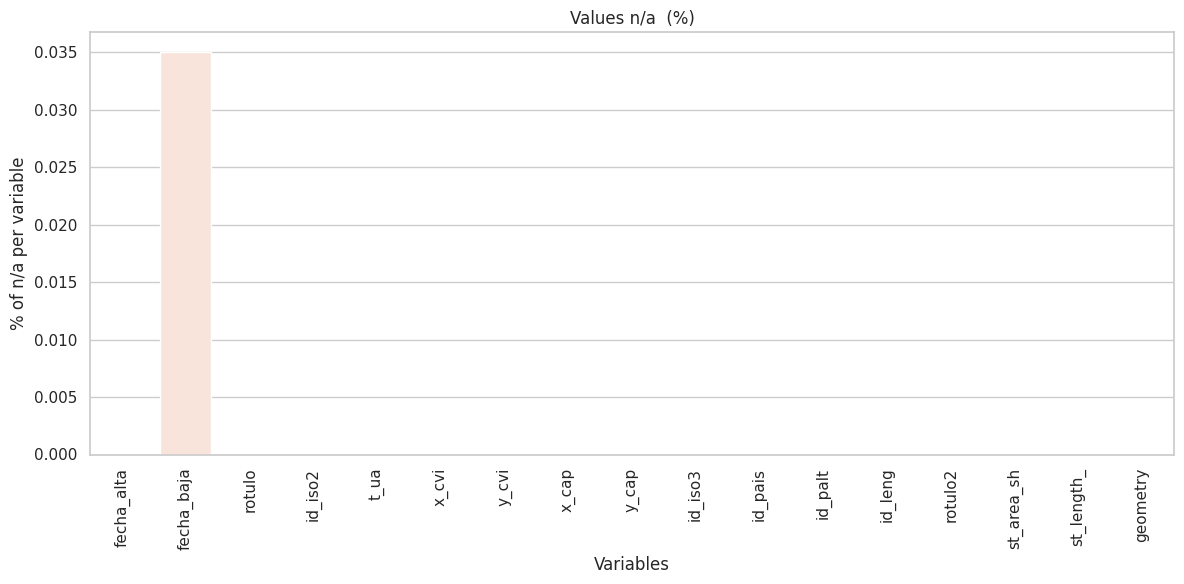

In [44]:
# Nulls and n/a check 

n_a = geo_world.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
# Drops Antarctica since it's not useful for this analysis and allows a better visualization 
geo_world = geo_world[geo_world['id_leng'] != 'Antarctica']

In [46]:
data_values_en.columns

Index(['Municipality', 'Total', 'Residents', 'Non_residents', 'European_Union',
       'Germany', 'Belgium', 'France', 'Italy', 'Netherlands', 'Portugal',
       'United_Kingdom', 'Japan', 'United_States', 'Shape__Are', 'Shape__Len',
       'geometry', 'Code', 'Province'],
      dtype='object')

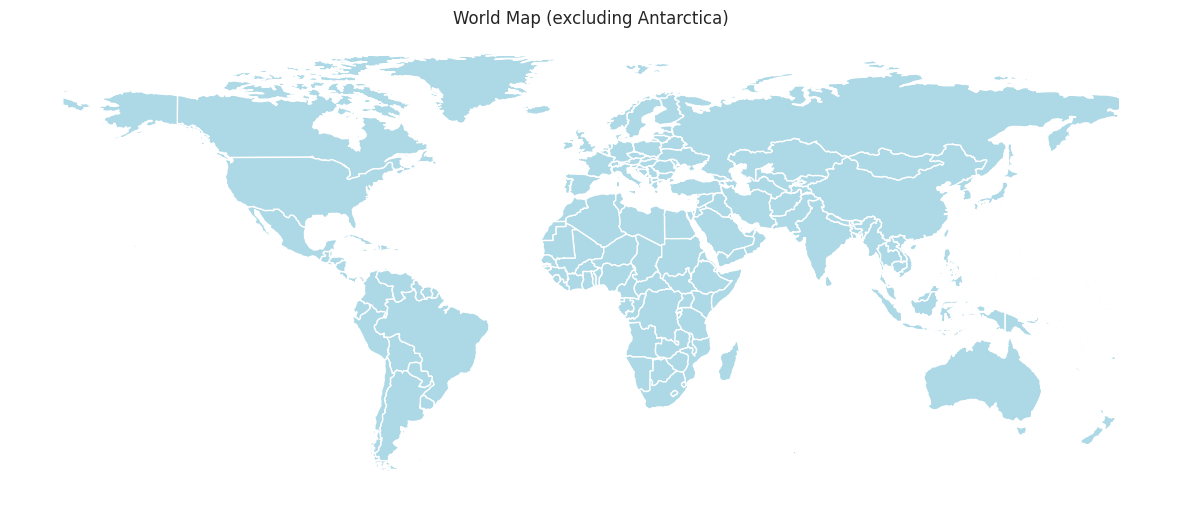

In [47]:
# Plot 
fig, ax = plt.subplots(figsize=(15, 15))
geo_world.plot(ax=ax, color='lightblue', )

# Title and labels
ax.set_title('World Map (excluding Antarctica)')
ax.axis('off')
plt.show()

In [48]:
# Checking the name formats in geo_world
for i in geo_world['id_leng']:
    print(i)

Cameroon
Canada
Cape Verde
Tonga
Côte d’Ivoire
Jordan
Belize
Bhutan
Nepal
Bolivia
Bosnia and Herzegovina
Botswana
Bulgaria
Burkina Faso
Burundi
Cambodia
Brazil
Brunei
Samoa
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Democratic Republic of the Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Timor-Leste
Mali
Egypt
El Salvador
Equatorial Guinea
Eritrea
Iraq
North Korea
Malta
Ireland
Israel
Italy
Jamaica
Japan
Maldives
Kazakhstan
Kenya
Kiribati
South Korea
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Marshall Islands
Mauritania
Mauritius
Mozambique
Netherlands
San Marino
São Tomé and Príncipe
Mexico
Myanmar/Burma
Namibia
Nauru
Micronesia
Moldova
Monaco
Mongolia
Morocco
Saudi Arabia
Senegal
Seychelles
S

In [49]:
# Countries to plot 
to_plot = ['Germany', 'Belgium', 'France', 'Italy', 'Netherlands', 'Portugal',
       'United Kingdom', 'Japan', 'United States']

spain = geo_world[geo_world['id_leng'] == 'Spain']

# New DataFrame with the countries to plot
to_plot_map = geo_world[geo_world['id_leng'].isin(to_plot)]
to_plot_map.head()

fecha_alta fecha_baja                     rotulo id_iso2  t_ua  \
34   2019-12-31       None                    Bélgica      BE    97   
63   2019-12-31       None                     Italia      IT    97   
65   2019-12-31       None                      Japón      JP    97   
89   2019-12-31       None               Países Bajos      NL    97   
129  2019-12-31       None  Estados Unidos de América      US    97   

          x_cvi      y_cvi       x_cap      y_cap id_iso3 id_pais id_palt  \
34     4.683371  50.663293    4.367998  50.837004     BEL     056      BE   
63    12.548149  42.755117   12.520000  41.879997     ITA     380      IT   
65   138.163664  36.165335  139.809007  35.683002     JPN     392      JP   
89     4.911479  51.912647    4.894840  52.373043     NLD     528      NL   
129 -101.067988  38.846321  -76.953834  38.890908     USA     840      US   

           id_leng                   rotulo2   st_area_sh  st_length_  \
34         Belgium                   Belgium     3.913962   10.280970   
63           Italy                     Italy    33.507260   70.693725   
65           Japan                     Japan    38.494617  116.694751   
89     Netherlands               Netherlands     4.671857   16.591033   
129  United States  United States of America  1131.837336  533.827642   

                                              geometry  
34   POLYGON ((5.53518 51.28690, 5.77363 51.17329, ...  
63   MULTIPOLYGON (((12.13016 46.92203, 12.13079 46...  
65   MULTIPOLYGON (((141.19237 41.39692, 141.32410 ...  
89   MULTIPOLYGON (((6.63520 53.56745, 6.81411 53.4...  
129  MULTIPOLYGON (((-95.08437 49.36249, -95.05653 ...

### Nationality Identification

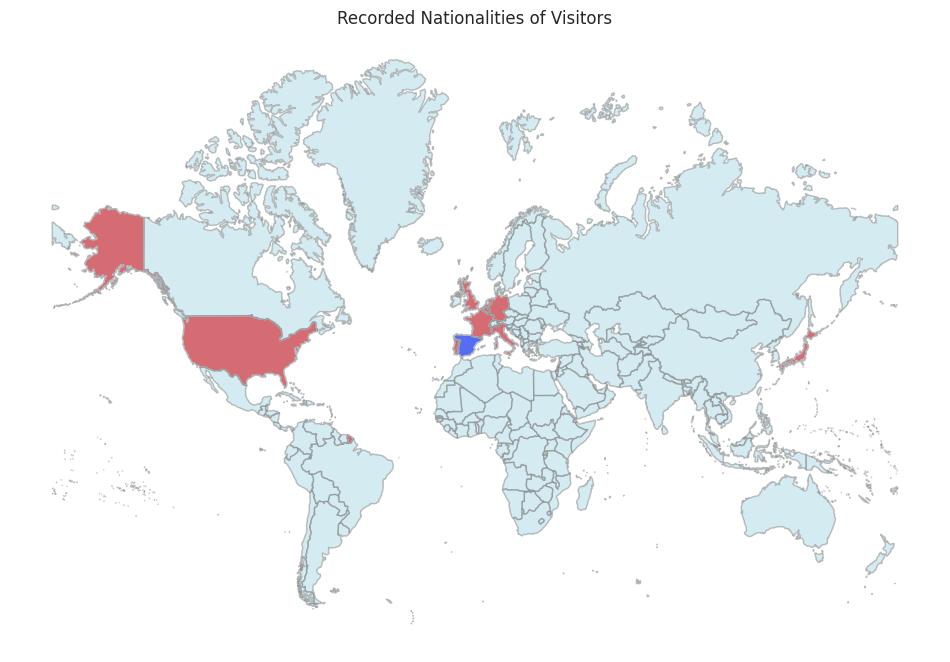

In [50]:
# GeoDataFrame to EPSG:3857 (WGS 84 / Pseudo-Mercator)
data_transformed = geo_world.to_crs(epsg=3857)
data_transformed2 = to_plot_map.to_crs(epsg=3857)
spain_transformed = spain.to_crs(epsg=3857)

# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
data_transformed2.plot(ax=ax, color='red', )
spain_transformed.plot(ax=ax, color='Blue', )

# Overlays the data on the base map
data_transformed.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.5)  

# Title and labels
ax.set_title('Recorded Nationalities of Visitors')
ax.axis('off')
plt.show()

This data does not represent the entire spectrum of international visitors to Spain. The selected nationalities are : Germany, Belgium, France, Italy, Netherlands, Portugal, United Kingdom, Japan, United States and the residents in Spain, assumed, obviously, most of them as Spanishs nationals.  

The selection of countries covers several European nations, which are likely to have high travel mobility between them due to their proximity and the ease of travel within the European Union. It also includes the United States and Japan, which are significant sources of international tourists.

In [51]:
# Source country of visitors
selected_columns = ['Germany', 'Belgium', 'France', 'Italy', 'Netherlands', 'Portugal', 'United_Kingdom', 'Japan', 'United_States']
data_selected = data_values_en[selected_columns]

# Total visitors per source country 
column_totals = data_selected.sum()

# Creates a DataFrame 
tourists = pd.DataFrame(column_totals)

new_index = range(len(tourists))
tourists['Index'] = new_index
tourists.set_index('Index', inplace=True)
tourists['Country'] = selected_columns
tourists.rename(columns={0: 'Total_visitors'}, inplace=True)

In [52]:
# Checking the new DataFrame
tourists

Total_visitors         Country
Index                                
0             6975808         Germany
1             1109081         Belgium
2             4041106          France
3             2473752           Italy
4             1687172     Netherlands
5              994656        Portugal
6             8778268  United_Kingdom
7              484703           Japan
8             2394051   United_States

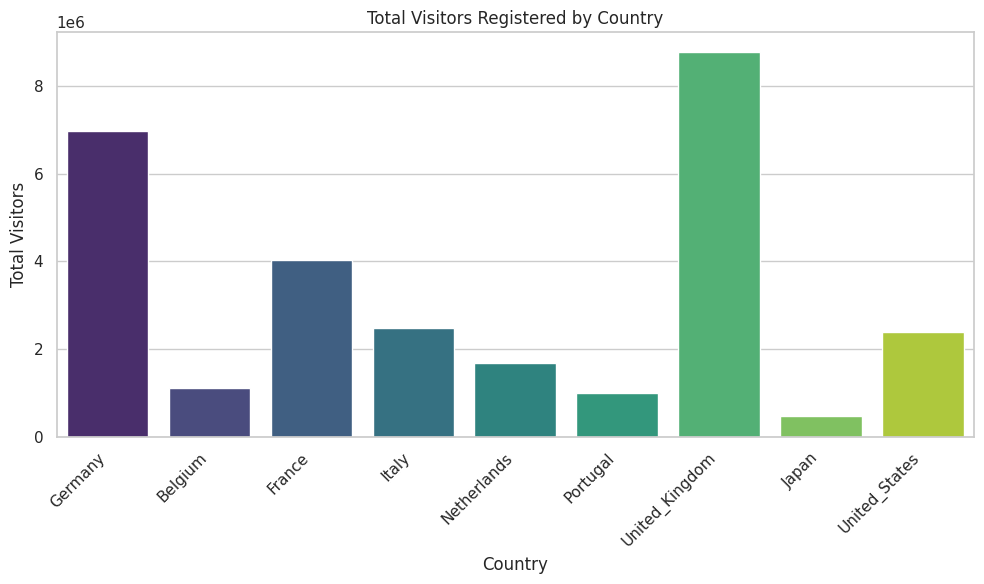

In [53]:
# Seaborn style
sns.set_style("whitegrid")

# Barplot
plt.figure(figsize=(10, 6))  
sns.barplot(data=tourists, x='Country', y='Total_visitors', palette='viridis')  
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Total Visitors Registered by Country')

# Plot
plt.tight_layout()  
plt.show()

We can see that the United Kingdom stands out with the highest number of visitors, followed by Germany, with a substantial number as well. France, Italy, and the United States show a moderate number of visitors, while Belgium, Netherlands, Portugal, and Japan have relatively fewer visitors in this dataset.  


### Top Nationalities and Preferences

In this part of the project, we can see the top three nationalities that visit the country. We will explore, by using mapping techniques,  their choice of destination and examine whether there are consistent patterns across these demographics. The goal of overlaying these maps, is to uncover any correlations or disparities in their preferred destinations, shedding light on the diverse preferences and travel behaviors. 

In [54]:
# New DataFrame for visitors of U.K including relevant variables
data_uk = data_values_en[['Municipality','United_Kingdom', 'Shape__Are', 'Shape__Len',
       'geometry', 'Code', 'Province']]

In [55]:
# Sorted data 
data_uk_sorted = data_uk.sort_values(by='United_Kingdom', ascending=False)[0:5]

data_uk_sorted

Municipality  United_Kingdom    Shape__Are     Shape__Len  \
3       Benidorm          820659  6.265783e+07   50162.286745   
33     Barcelona          657877  1.820915e+08  151263.961363   
130        Adeje          518533  1.366764e+08   71962.702905   
16        Calvià          428756  2.441638e+08  164138.713469   
95        Madrid          359373  1.046186e+09  229796.566230   

                                              geometry Code  \
3    MULTIPOLYGON (((-0.12822 38.50178, -0.12888 38...   03   
33   MULTIPOLYGON (((2.07520 41.41602, 2.07556 41.4...   08   
130  POLYGON ((-16.67690 28.20952, -16.67683 28.209...   38   
16   MULTIPOLYGON (((2.45585 39.50404, 2.45586 39.5...   07   
95   POLYGON ((-3.64591 40.63918, -3.64454 40.63802...   28   

                   Province  
3          Alacant/Alicante  
33                Barcelona  
130  Santa Cruz de Tenerife  
16            Illes Balears  
95                   Madrid

In [56]:
# Function that separates the provinces of the Canary Islands from the peninsular provinces

def segment(data_country):
    
    for i in data_country['Province']:
        if i == 'Santa Cruz de Tenerife' or i == 'Las Palmas':
            prov_can.append(i)
        else: 
            prov_pen.append(i)


In [57]:
# Empty list
prov_pen = []
prov_can = []

# Applies the function 
segment(data_uk_sorted)

# New DataFrames with peninsular provinces and provinces of the Canary Islands
provinces_uk_pen = province_limits_peninsula[province_limits_peninsula['NAMEUNIT'].isin(prov_pen)]
provinces_uk_can = province_limits_canarias[province_limits_canarias['NAMEUNIT'].isin(prov_can)]

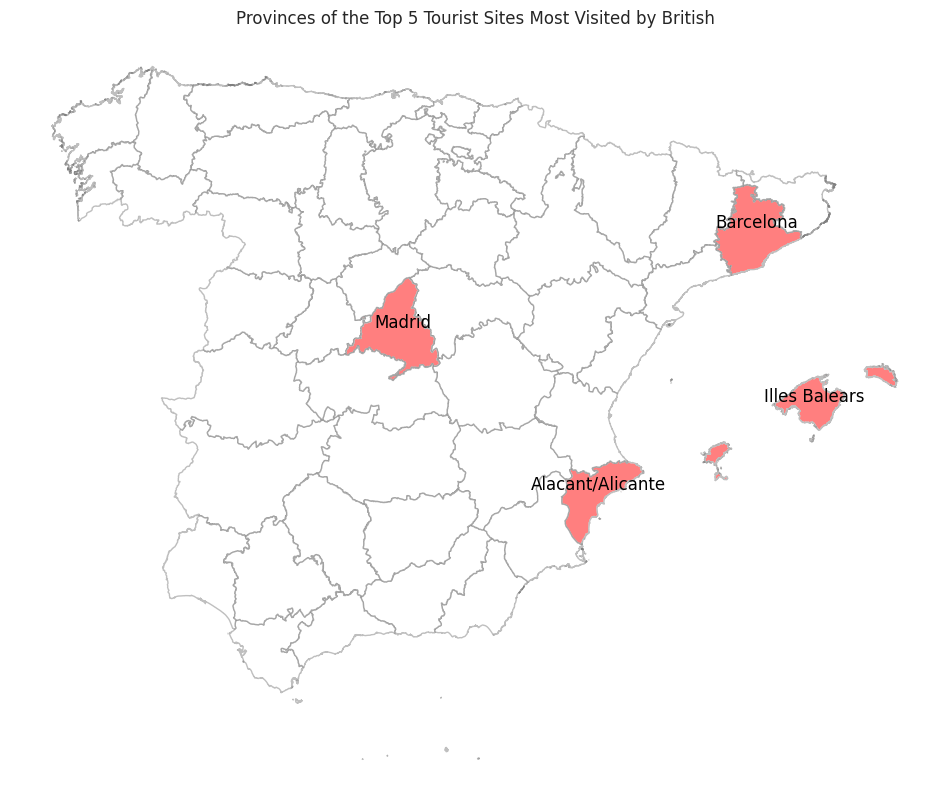

In [58]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
provinces_uk_pen.plot(ax=ax, color='red', )



# Overlays the data on the base map
province_limits_peninsula.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

for idx, row in provinces_uk_pen.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='Black')

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by British')
ax.axis('off')
plt.show()
plt.show()

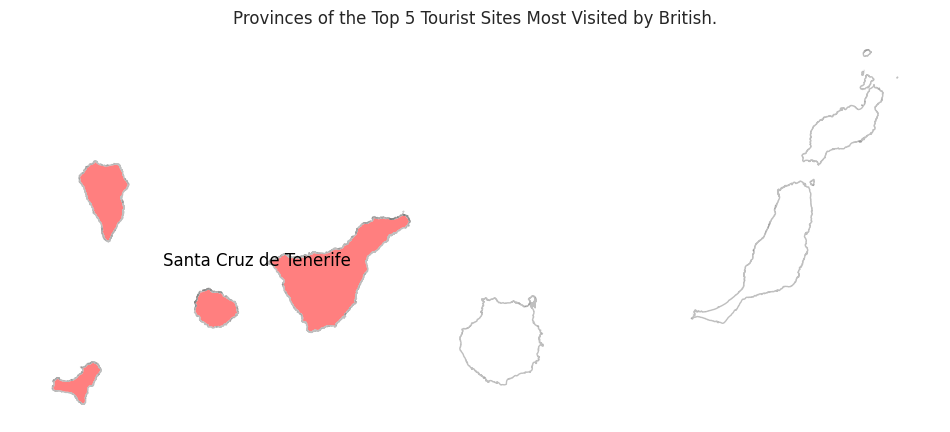

In [59]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
provinces_uk_can.plot(ax=ax, color='red', )



# Overlays the data on the base map
province_limits_canarias.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

for idx, row in provinces_uk_can.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='Black')

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by British.')
ax.axis('off')
plt.show()
plt.show()

As we can see, among British visitors, the top-5 destination are located in 5 provinces: Barcelona, Alicante, Balearic Islands, Santa Cruz de Tenerife and Madrid. As each preferred site is located in a distinct province, we can say there's some diversity. 
Also, while overall statistics may highlight Las Palmas as a frequently visited destination for the broader tourist population, it is the province of Santa Cruz de Tenerife that captivates British tourists. 

In [60]:
# New DataFrame for visitors from Germany including relevant variables
data_ger = data_values_en[['Municipality',
       'Germany', 'Shape__Are', 'Shape__Len',
       'geometry', 'Code', 'Province']]

In [61]:
# Sorted data 
data_ger_sorted = data_ger.sort_values(by='Germany', ascending=False)[0:5]

data_ger_sorted

Municipality  Germany    Shape__Are     Shape__Len  \
23           Palma de Mallorca   819582  3.484012e+08  210279.263294   
120                     Pájara   544424  4.937392e+08  210740.411635   
122  San Bartolomé de Tirajana   466821  4.274383e+08  120487.133302   
16                      Calvià   423292  2.441638e+08  164138.713469   
33                   Barcelona   421726  1.820915e+08  151263.961363   

                                              geometry Code       Province  
23   MULTIPOLYGON (((2.96092 39.16392, 2.96071 39.1...   07  Illes Balears  
120  POLYGON ((-14.15206 28.40594, -14.15137 28.405...   35     Las Palmas  
122  POLYGON ((-15.59869 27.96040, -15.59893 27.960...   35     Las Palmas  
16   MULTIPOLYGON (((2.45585 39.50404, 2.45586 39.5...   07  Illes Balears  
33   MULTIPOLYGON (((2.07520 41.41602, 2.07556 41.4...   08      Barcelona

In [62]:
# Empty list 
prov_pen = []
prov_can = []

# Applies the function 
segment(data_ger_sorted)

# New DataFrames with peninsular provinces and provinces of the Canary Islands
provinces_ger_pen = province_limits_peninsula[province_limits_peninsula['NAMEUNIT'].isin(prov_pen)]
provinces_ger_can = province_limits_canarias[province_limits_canarias['NAMEUNIT'].isin(prov_can)]

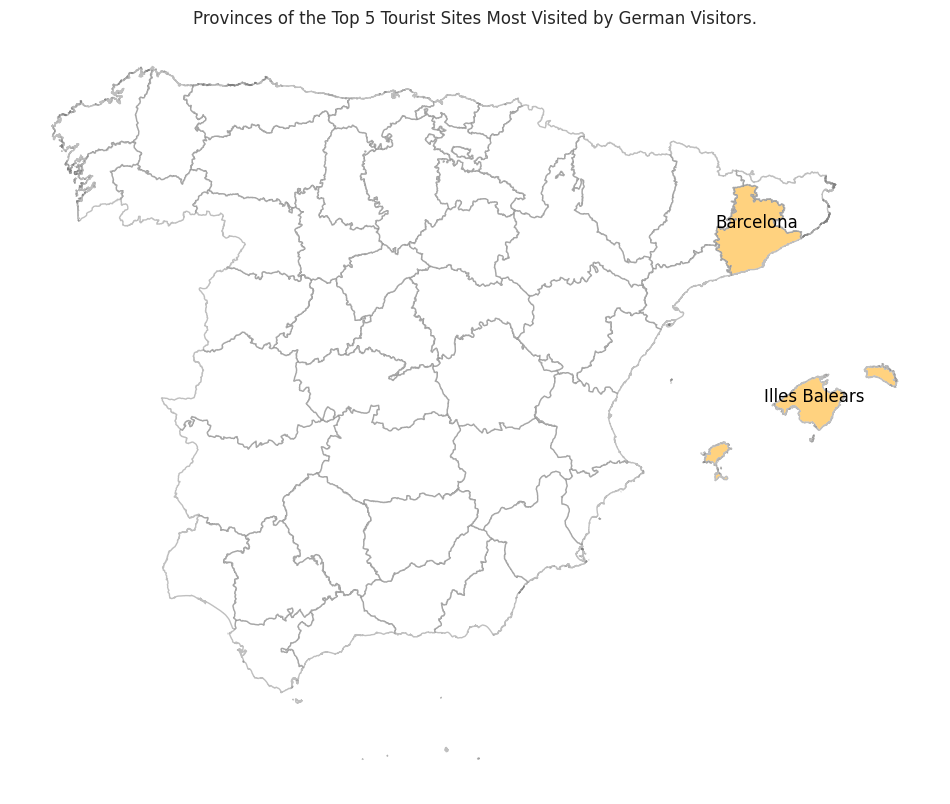

In [63]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
provinces_ger_pen.plot(ax=ax, color='orange', )



# Overlays the data on the base map
province_limits_peninsula.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

for idx, row in provinces_ger_pen.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='Black')

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by German Visitors.')
ax.axis('off')
plt.show()

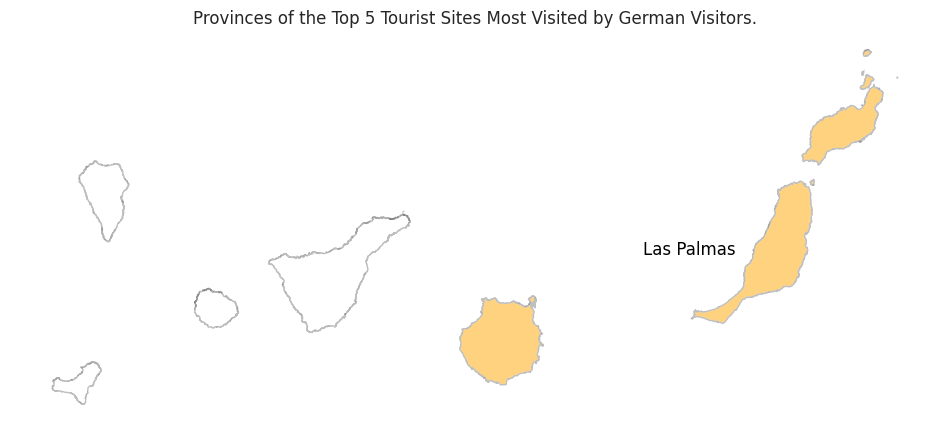

In [64]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
provinces_ger_can.plot(ax=ax, color='orange', )


# Overlays the data on the base map
province_limits_canarias.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

for idx, row in provinces_ger_can.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='Black')

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by German Visitors.')
ax.axis('off')
plt.show()
plt.show()

For German visitors, the top-5 destinations exhibit a more concentrated preference, with three distinct provinces capturing their attention: Balearic Islands, Las Palmas and Barcelona. These destinations favored by German tourists appears to revolve around island getaways. This trend suggests a strong inclination towards destinations offering optimal weather conditions, abundant sunshine, and pristine beaches. 

In [65]:
# New DataFrame for visitors from France including relevant variables
data_fra = data_values_en[['Municipality',
       'France', 'Shape__Are', 'Shape__Len',
       'geometry', 'Code', 'Province']]

In [66]:
# Sorted data 
data_fra_sorted = data_fra.sort_values(by='France', ascending=False)[0:5]

data_fra_sorted.head()

Municipality  France    Shape__Are     Shape__Len  \
33       Barcelona  609779  1.820915e+08  151263.961363   
95          Madrid  333602  1.046186e+09  229796.566230   
65   Lloret de Mar  239315  8.688358e+07   46312.784075   
139        Sevilla  184269  2.242894e+08   93427.765127   
67           Roses  175200  8.400383e+07   58521.399362   

                                              geometry Code   Province  
33   MULTIPOLYGON (((2.07520 41.41602, 2.07556 41.4...   08  Barcelona  
95   POLYGON ((-3.64591 40.63918, -3.64454 40.63802...   28     Madrid  
65   MULTIPOLYGON (((2.83901 41.69245, 2.83869 41.6...   17     Girona  
139  MULTIPOLYGON (((-6.03175 37.30033, -6.03270 37...   41    Sevilla  
67   POLYGON ((3.17898 42.30289, 3.17992 42.30195, ...   17     Girona

In [67]:
# Empty list
prov_pen = []
prov_can = []

# Applies the function 
segment(data_fra_sorted)

# New DataFrames with peninsular provinces and provinces of the Canary Islands
provinces_fra_pen = province_limits_peninsula[province_limits_peninsula['NAMEUNIT'].isin(prov_pen)]
provinces_fra_can = province_limits_canarias[province_limits_canarias['NAMEUNIT'].isin(prov_can)]

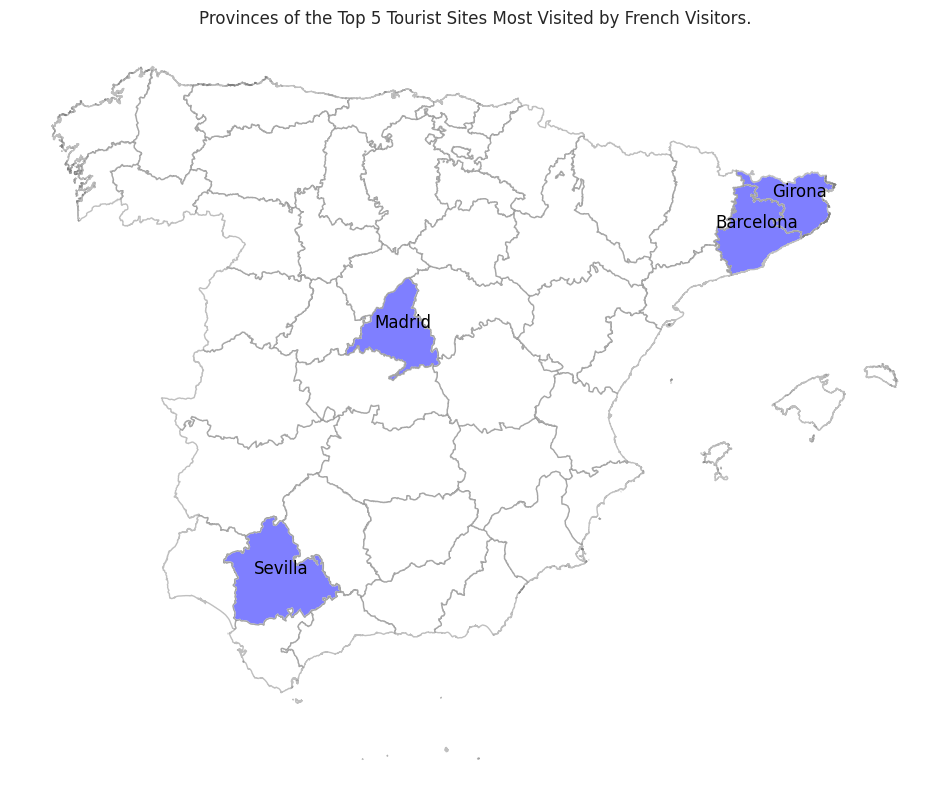

In [68]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))
provinces_fra_pen.plot(ax=ax, color='blue', )

# Overlays the data on the base map
province_limits_peninsula.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

for idx, row in provinces_fra_pen.iterrows():
    ax.annotate(text=row['NAMEUNIT'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  
                textcoords="offset points",  
                horizontalalignment='center', 
                fontsize=12, 
                color='Black')

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by French Visitors.')
ax.axis('off')
plt.show()

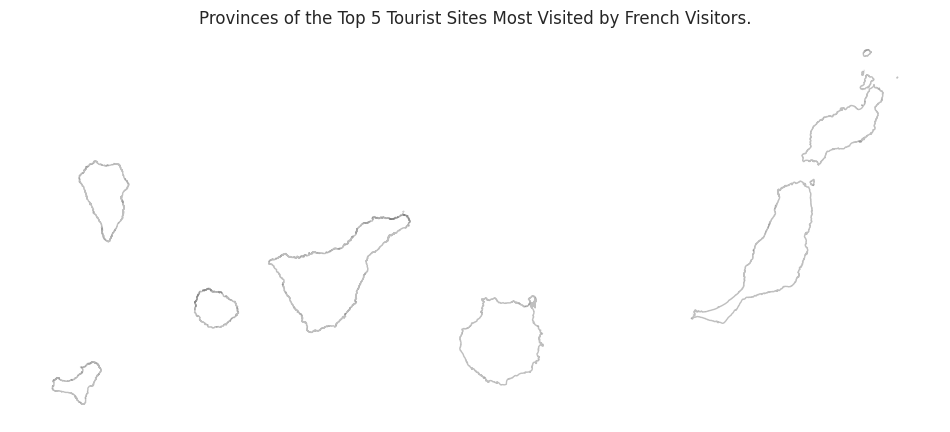

In [69]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))

# Overlays the data on the base map
province_limits_canarias.plot(ax=ax, color='white', edgecolor='gray', alpha=0.5) 

# Title and labels
ax.set_title('Provinces of the Top 5 Tourist Sites Most Visited by French Visitors.')
ax.axis('off')
plt.show()
plt.show()

This time we observe a distinctive pattern that differs from the previous nationalities analyzed. French visitors exhibit a preference for Barcelona, Madrid, Girona, and Sevilla. The inclusion of Girona among the top destinations for French tourists holds particular significance, as this province is geographically proximate to France.
This dispersion of preferences suggests a nuanced approach to travel, with French tourists seeking out varied experiences that appear to be closely associated with major urban centers rather than emphasizing sun and beaches, as observed in the case of British and German visitors. This distinction reflects French tourists' inclination towards cultural immersion, historical exploration, and cosmopolitan experiences offered by large cities.

### Conclusion and Insights

- The data on the top nationalities visiting Spain (specifically British, German, and French) reveals a nuanced picture of tourism patterns. British tourists, with their varied selection of destinations across several provinces, show an eclectic taste that spans from the cultural experiences of urban centers to the leisurely appeal of coastal resorts and islands. German tourists express a clear preference for Spain's islands, which aligns with their search for sun-soaked retreats and relaxed environments. French tourists tend to favor proximity and cultural affinity, choosing destinations that offer rich historical and urban experiences.  
- The distinction between the travel patterns of resident and non-resident visitors in Spain is marked. Residents tend to be less concentrated in their tourism, indicating a broader exploration of their country's diverse offerings. Non-residents are more concentrated in specific popular destinations and mainly in coastal provinces, which might be attributed to the international reputation of these areas or to established tourism infrastructure catering to foreign preferences.  
- The overall visitation data suggests that Spain's appeal to international tourists is strong and multifaceted. Spain offers a variety of experiences that can cater to different tastes — from the cultural and historical allure of its cities to the natural beauty and recreational opportunities of its coastal and island regions. However, the concentration of non-resident visitors in certain areas also suggests that some regions might be under-visited by international tourists, which could be an opportunity for Spain's tourism sector to diversify its appeal and distribute economic benefits more broadly.  

The insights from this analysis could inform tourism development and marketing strategies. Understanding that British tourists are drawn to a variety of experiences could lead to the development of multi-destination packages. For German tourists, enhancing the quality and sustainability of island resorts could be a focus, while for French tourists, promoting cultural and city tourism could be key. The distinct patterns of resident and non-resident visitors highlight the importance of creating tailored experiences for each group. For residents, promoting lesser-known destinations and off-peak travel could help distribute tourism benefits more evenly throughout the year. For non-residents, there is potential to market the less visited yet culturally rich inland areas.  

In conclusion, Spain's tourism industry benefits from a diverse array of attractions that appeal to a wide spectrum of visitors. By leveraging the detailed understanding of visitor preferences and patterns, Spain can further optimize its tourism offerings, enhance visitor experiences, and ensure sustainable growth in the sector.